In [6]:
import os
import pandas as pd

# List all CSV files in the directory
data_folder = r"C:\Users\Jermaine Antonio\Downloads\fifa_project"
files = pd.read_csv(r"C:\Users\Jermaine Antonio\Downloads\fifa_project\players_18.csv")

print("Found CSV files:", files)

# Load and preview each CSV file
for file in files:
    df = pd.read_csv(os.path.join(data_folder, file))
    pd.set_option('display.max_columns', None)
    print(f"\nFile: {file}")
    print(df.head())  # Show first 5 rows
    print(df.columns)  # Show column names


Found CSV files:        sofifa_id                                         player_url  \
0          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1         158023  https://sofifa.com/player/158023/lionel-messi/...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         167495  https://sofifa.com/player/167495/manuel-neuer/...   
4         176580  https://sofifa.com/player/176580/luis-suarez/1...   
...          ...                                                ...   
17587     237463  https://sofifa.com/player/237463/adam-kelsey/1...   
17588     231381  https://sofifa.com/player/231381/jordan-young/...   
17589     240404  https://sofifa.com/player/240404/jack-keeble/1...   
17590      11728  https://sofifa.com/player/11728/barry-richards...   
17591     235352  https://sofifa.com/player/235352/tommy-kassemo...   

              short_name                            long_name  age  \
0      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveir

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Jermaine Antonio\\Downloads\\fifa_project\\sofifa_id'

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Jermaine Antonio\Downloads\fifa_project\players_18.csv")

# Define only the columns you want to keep
columns_to_keep = [
   "sofifa_id","short_name","long_name","age","dob","height_cm","weight_kg","nationality","club","overall",
    "potential","value_eur","wage_eur","player_positions","preferred_foot","weak_foot","skill_moves","pace",
    "shooting","passing","dribbling","defending","physic","gk_diving","gk_handling","gk_kicking","gk_reflexes",
    "gk_speed","gk_positioning"
]

# Select only those columns
df = df[columns_to_keep]

# Save the cleaned dataset
df.to_csv("fifa23_final.csv", index=False)

print("Final dataset saved as fifa23_final.csv!")


Final dataset saved as fifa23_final.csv!


In [2]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("fifa23_final.csv")

# Show basic info
print(df.info())  

# Show summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sofifa_id         17592 non-null  int64  
 1   short_name        17592 non-null  object 
 2   long_name         17592 non-null  object 
 3   age               17592 non-null  int64  
 4   dob               17592 non-null  object 
 5   height_cm         17592 non-null  int64  
 6   weight_kg         17592 non-null  int64  
 7   nationality       17592 non-null  object 
 8   club              17592 non-null  object 
 9   overall           17592 non-null  int64  
 10  potential         17592 non-null  int64  
 11  value_eur         17592 non-null  int64  
 12  wage_eur          17592 non-null  int64  
 13  player_positions  17592 non-null  object 
 14  preferred_foot    17592 non-null  object 
 15  weak_foot         17592 non-null  int64  
 16  skill_moves       17592 non-null  int64 

In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Select numerical features for similarity
features = ["overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]
df_filtered = df.dropna(subset=features)  # Remove rows with missing values

# Train a Nearest Neighbors model
model = NearestNeighbors(n_neighbors=5, metric="euclidean")
model.fit(df_filtered[features])

# Function to find similar players
def find_similar_players(player_name):
    if player_name not in df_filtered["short_name"].values:
        return "Player not found."

    player_stats = df_filtered[df_filtered["short_name"] == player_name][features].values
    distances, indices = model.kneighbors(player_stats)

    print(f"Players similar to {player_name}:")
    for idx in indices[0]:
        print(df_filtered.iloc[idx]["short_name"])

# Example Usage
find_similar_players("L. Messi")


Players similar to L. Messi:
L. Messi
Neymar
A. Robben
P. Dybala
E. Hazard


In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("fifa23_final.csv")

# Features to use for recommendation (e.g., attributes that make players similar)
features = ["overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]
df_filtered = df.dropna(subset=features)  # Remove rows with missing values in these columns


In [6]:
from sklearn.neighbors import NearestNeighbors

# Initialize the Nearest Neighbors model with '5' nearest neighbors
model = NearestNeighbors(n_neighbors=5, metric="euclidean")

# Fit the model using the selected features
model.fit(df_filtered[features])


NearestNeighbors(metric='euclidean')

In [7]:
def find_similar_players(player_name):
    # Check if the player exists in the dataset
    if player_name not in df_filtered["short_name"].values:
        return "Player not found."

    # Get the player's stats
    player_stats = df_filtered[df_filtered["short_name"] == player_name][features].values

    # Find the nearest neighbors (similar players)
    distances, indices = model.kneighbors(player_stats)

    # Display similar players
    print(f"Players similar to {player_name}:")
    for idx in indices[0]:
        print(df_filtered.iloc[idx]["short_name"])

# Example Usage
find_similar_players("L. Messi")


Players similar to L. Messi:
L. Messi
Neymar
A. Robben
P. Dybala
E. Hazard


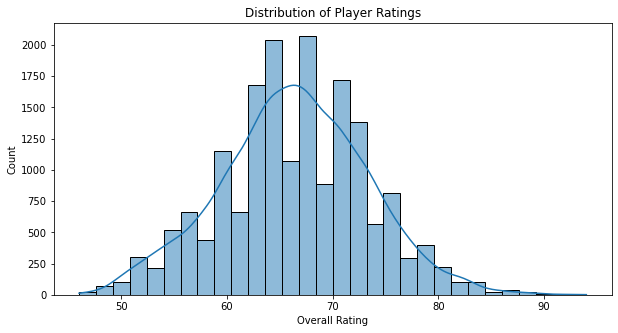

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of overall ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['overall'], bins=30, kde=True)
plt.title("Distribution of Player Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Count") # Save image
plt.show()


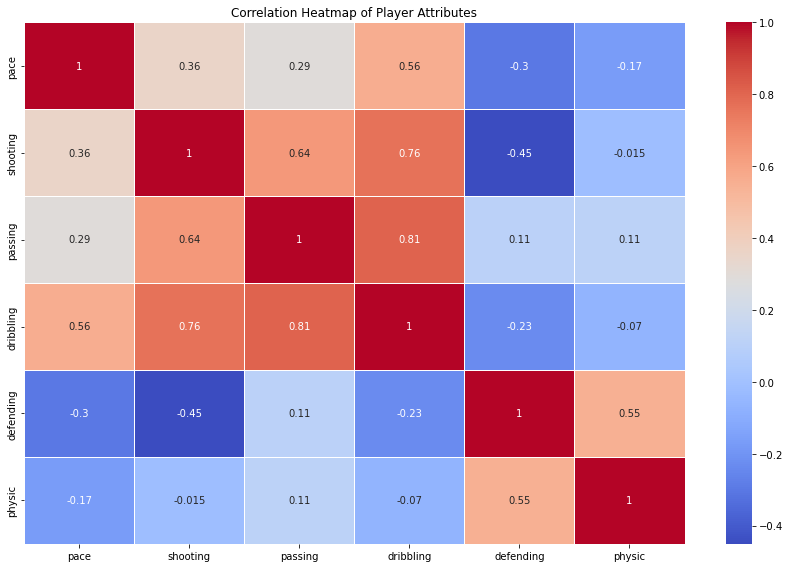

In [4]:
# Select a subset of attributes for visualisation
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[attributes].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Player Attributes')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('player_attributes_heatmap.png')
plt.show()


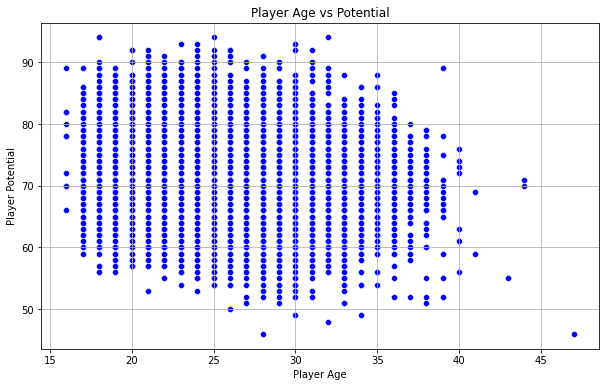

In [5]:
# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='potential', data=df, color='blue')
plt.title('Player Age vs Potential')
plt.xlabel('Player Age')
plt.ylabel('Player Potential')
plt.grid(True)

# Save the plot as an image file
plt.savefig('age_vs_potential.png')
plt.show()

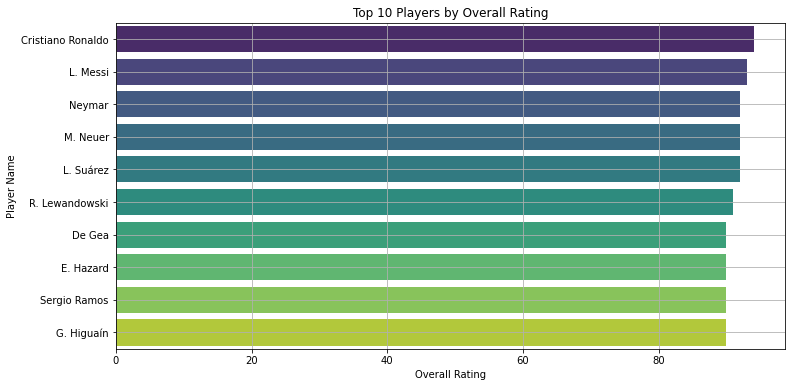

In [6]:
# Sorting the data by overall rating
top_players = df[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x='overall', y='short_name', data=top_players, palette='viridis')
plt.title('Top 10 Players by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.grid(True)

# Save the plot as an image file
plt.savefig('top_10_players_by_rating.png')
plt.show()
